In [9]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [11]:
#read file from path
df = pd.read_csv(r'C:\Users\tneel\Downloads\final_project_sentiment_analysis\archive\Reviews.csv')

In [13]:
df.head() #display first five rows of the datafile 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
df.shape #displays number of (rows, columns) in the data file

(568454, 10)

In [17]:
df.isnull().sum() #check for null values

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [19]:
df = pd.read_csv(r'C:\Users\tneel\Downloads\final_project_sentiment_analysis\archive\Reviews.csv')

In [21]:
df.shape

(568454, 10)

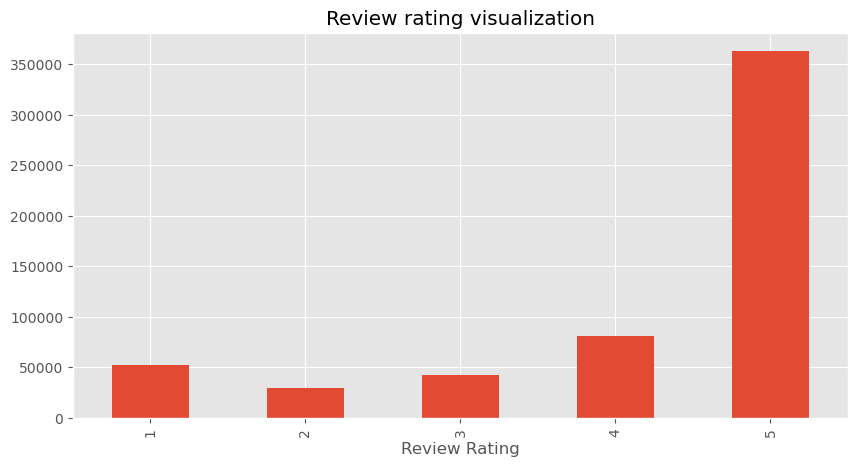

In [23]:
#EDA
x_axis = df['Score'].value_counts().sort_index().plot(kind='bar', title='Review rating visualization', figsize=(10, 5))
x_axis.set_xlabel('Review Rating')
plt.show()

In [25]:
#text analysis
example_text = df['Text'][500]

In [27]:
print(example_text)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


In [29]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tneel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tneel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\tneel\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tneel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [31]:
tokens = nltk.word_tokenize(example_text)
print (tokens)

['I', 'bought', 'these', 'for', 'the', 'office', 'and', 'no', 'one', 'can', 'put', 'them', 'down', '.', 'I', "'m", 'ordering', 'more', 'today', 'and', 'it', 'has', 'only', 'been', '2', 'weeks', '.', 'Did', "n't", 'have', 'to', 'shop', 'for', 'them', 'either', ',', 'Amazon', 'brought', 'it', 'to', 'my', 'door', '!']


In [33]:
tagged = nltk.pos_tag(tokens) #create Part-Of-Speech Tags

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  bought/VBD
  these/DT
  for/IN
  the/DT
  office/NN
  and/CC
  no/DT
  one/NN
  can/MD
  put/VB
  them/PRP
  down/RP
  ./.
  I/PRP
  'm/VBP
  ordering/VBG
  more/JJR
  today/NN
  and/CC
  it/PRP
  has/VBZ
  only/RB
  been/VBN
  2/CD
  weeks/NNS
  ./.
  Did/VBP
  n't/RB
  have/VB
  to/TO
  shop/VB
  for/IN
  them/PRP
  either/DT
  ,/,
  (PERSON Amazon/NNP)
  brought/VBD
  it/PRP
  to/TO
  my/PRP$
  door/NN
  !/.)


In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tneel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I am super happy')

{'neg': 0.0, 'neu': 0.116, 'pos': 0.884, 'compound': 0.8225}

In [41]:
sia.polarity_scores('That is so bad!')

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.6988}

In [43]:
sia.polarity_scores(example_text)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [45]:
# Run the polarity score on the entire data
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [47]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index": 'Id'})
vaders = vaders.merge(df, how='left')

In [49]:
vaders.head() #display sentiment score of reviews and meta data

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Compound score from Amazon Star Review')

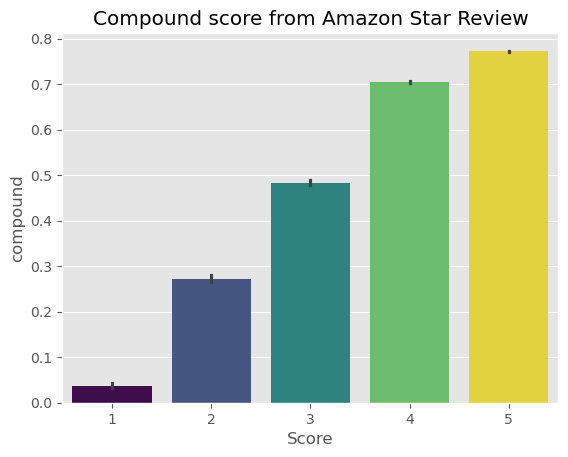

In [51]:
# Bar plot to visualize the relationship between Amazon ratings and the compound sentiment scores ('compound') 
x_axis = sns.barplot(data=vaders, x='Score', y='compound', hue='Score', palette='viridis', legend=False)
x_axis.set_title('Compound score from Amazon Star Review')

Text(0.5, 1.0, 'Negative Reviews')

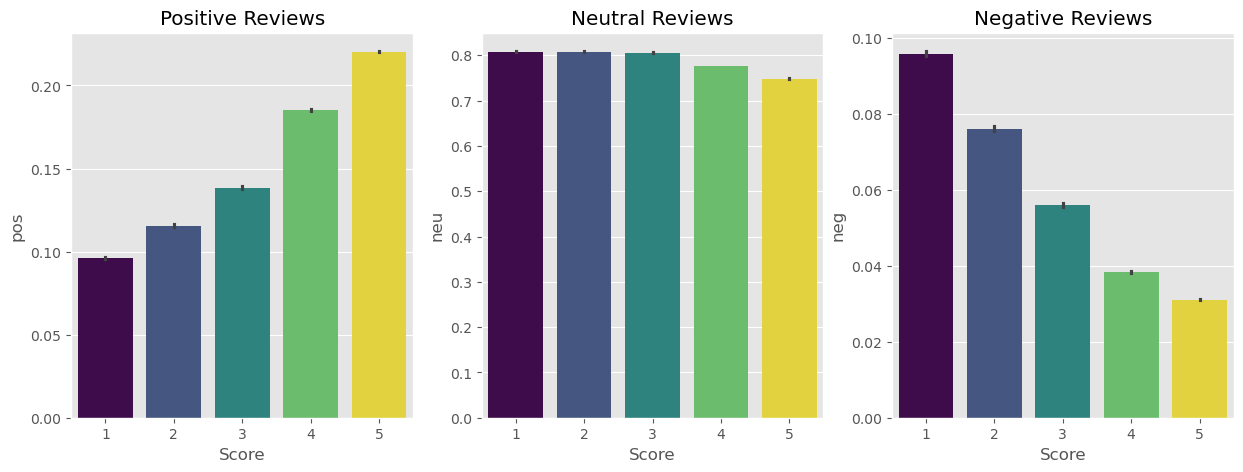

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos', hue='Score', legend=False, palette='viridis', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', hue='Score', legend=False, palette='viridis', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', hue='Score', legend=False, palette='viridis', ax=axs[2])
axs[0].set_title('Positive Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Negative Reviews')

In [65]:
#calculating accuracy for VADER model 
def vader_sentiment(compound_score):
    if compound_score > 0.05:
        return 'pos'
    elif compound_score < -0.05:
        return 'neg'
    else:
        return 'neu'

def calculate_accuracy(df):
    correct_predictions = 0
    total_predictions = len(df)

    for _, row in df.iterrows():
        true_sentiment = 'pos' if row['Score'] > 3 else ('neg' if row['Score'] < 3 else 'neu')
        
        vader_result = row['compound']
        vader_prediction = vader_sentiment(vader_result)

        if vader_prediction == true_sentiment:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

In [67]:
accuracy = calculate_accuracy(vaders)
print(f"Accuracy for VADER model: {accuracy:.4f}")

Accuracy for VADER model: 0.7970
